<h1>Credit Card Fraud Detection

1. Project Overview:
    - This project aims to develop a machine learning model capable of identifying fraudulent credit card transactions. Given the nature of financial data, it is critical for companies to detect these fraudulent activities to protect customers from unauthorized charges.

2. A key challenge is the severe class imbalance. Out of 284,807 transactions, only 492 are fraudulent, accounting for a mere 0.172% of the data. This means a model that simply predicts every transaction as "non-fraudulent" would achieve over 99% accuracy but would be completely useless for its intended purpose. Therefore, our focus will be on metrics that better reflect performance on imbalanced data, such as Precision, Recall, and the F1-Score.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("shayannaveed/credit-card-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:03<00:00, 22.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayannaveed/credit-card-fraud-detection/versions/1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = '/root/.cache/kagglehub/datasets/shayannaveed/credit-card-fraud-detection/versions/1/creditcard.csv'

try:
    df = pd.read_csv(dataset_path)
    print("1")
except FileNotFoundError:
    print("0")
    raise

1


<h1>Data Loading and Exploratory Data Analysis (EDA)

1. Dataset Features:
    - Time: Seconds elapsed between the current transaction and the first transaction.
    - Amount: The monetary value of the transaction.
    - V1 to V28: Anonymized features that are the result of a PCA (Principal Component Analysis) transformation to protect user identity.
    - Class: The target variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate one.

2. Initial Analysis:
    - The dataset was inspected for missing values and data types. It was found to be clean with no missing data.
    - A count of the Class variable confirmed the extreme imbalance: 284,315 non-fraudulent transactions vs. 492 fraudulent ones. This imbalance is the central problem to solve.

3. Correlation Analysis: A heatmap was generated to visualize the correlation between features. As expected, the PCA components (V1-V28) showed very little correlation with each other. This is a natural outcome of PCA, which aims to produce uncorrelated principal components.

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


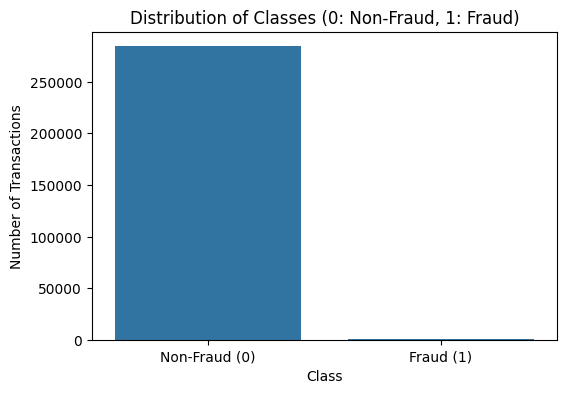

Class distribution plot saved as 'class_distribution.png'


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title("Distribution of Classes (0: Non-Fraud, 1: Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.xticks(ticks=[0,1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.savefig("class_distribution.png")
plt.show()
print("Class distribution plot saved as 'class_distribution.png'")

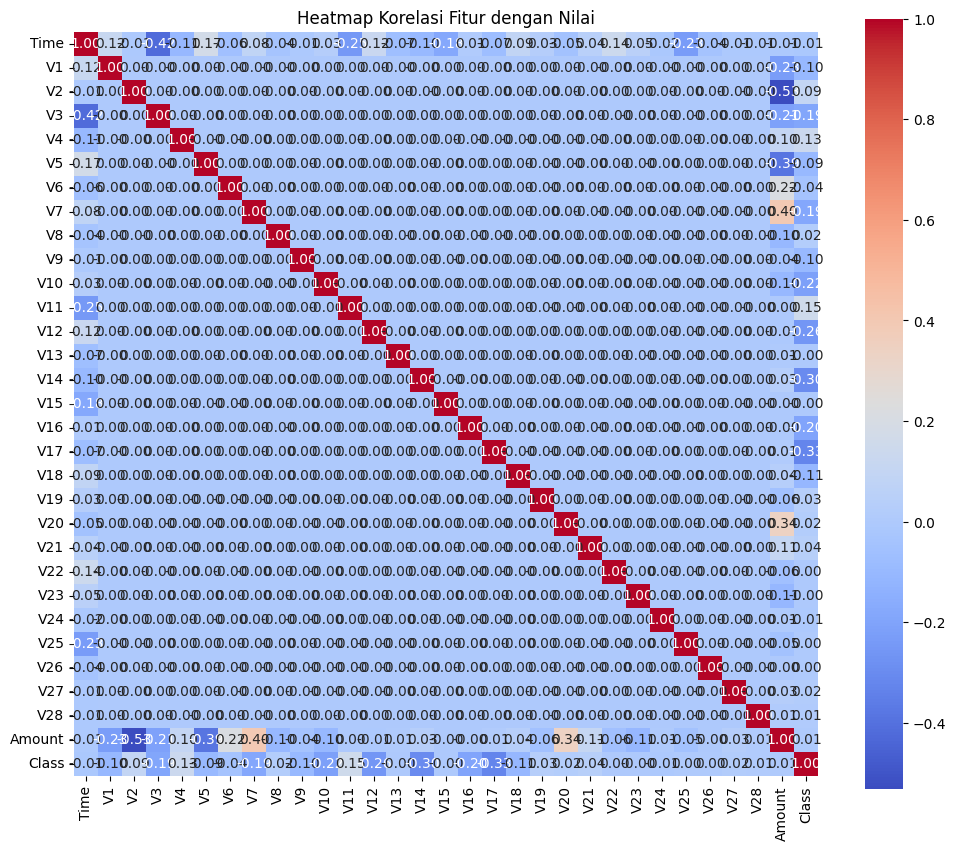

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Heatmap Korelasi Fitur dengan Nilai")
plt.show()

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

<h1>Data Preprocessing

Feature Scaling: 
- The Time and Amount columns were the only features not already transformed by PCA. These features had vastly different scales compared to the V1-V28 columns. To prevent them from disproportionately influencing the model, they were scaled using StandardScaler. This transforms the data to have a mean of 0 and a standard deviation of 1. The original Time and Amount columns were then replaced with their scaled versions.

In [ ]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled_array, columns=X.columns)

In [ ]:
print("\nShape of scaled features (X_scaled_df):", X_scaled_df.shape)
X_scaled_df.head()


Shape of scaled features (X_scaled_df): (284807, 30)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [ ]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

print("\nShape of training features (X_train):", X_train.shape)
print("Shape of testing features (X_test):", X_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

print("\nDistribution of classes in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of classes in testing set:")
print(y_test.value_counts(normalize=True))


Shape of training features (X_train): (227845, 30)
Shape of testing features (X_test): (56962, 30)
Shape of training target (y_train): (227845,)
Shape of testing target (y_test): (56962,)

Distribution of classes in training set:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

Distribution of classes in testing set:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [ ]:
X_train.to_csv("X_train_scaled.csv", index=False)
X_test.to_csv("X_test_scaled.csv", index=False)
y_train.to_csv("y_train.csv", index=False, header=True)
y_test.to_csv("y_test.csv", index=False, header=True)
print("\nScaled training and testing sets saved to CSV files.")


Scaled training and testing sets saved to CSV files.


In [ ]:
sample_size_tsne = min(10000, len(X_train))
if len(X_train) > sample_size_tsne:
    _, X_train_sample_tsne, _, y_train_sample_tsne = train_test_split(
        X_train, y_train,
        test_size=sample_size_tsne/len(X_train),
        stratify=y_train,
        random_state=42
    )
    print(f"\nCreated a stratified sample of {len(X_train_sample_tsne)} records from training data for t-SNE.")
else:
    X_train_sample_tsne = X_train
    y_train_sample_tsne = y_train
    print(f"\nUsing the full training set of {len(X_train_sample_tsne)} records for t-SNE.")

print("Shape of X_train_sample_tsne for t-SNE:", X_train_sample_tsne.shape)


Created a stratified sample of 10000 records from training data for t-SNE.
Shape of X_train_sample_tsne for t-SNE: (10000, 30)


In [ ]:
X_train_sample_tsne.to_csv("X_train_sample_tsne.csv", index=False)
y_train_sample_tsne.to_csv("y_train_sample_tsne.csv", index=False, header=True)
print("Sample for t-SNE (from training data) saved.")


Sample for t-SNE (from training data) saved.


# PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train = pd.read_csv("X_train_scaled.csv")
y_train_series = pd.read_csv("y_train.csv").squeeze()
X_test = pd.read_csv("X_test_scaled.csv")

In [ ]:
pca_explainer = PCA(random_state=42)
pca_explainer.fit(X_train)

explained_variance_ratio_cumulative = np.cumsum(pca_explainer.explained_variance_ratio_)

n_components_95_variance = np.argmax(explained_variance_ratio_cumulative >= 0.95) + 1
print(f"Number of components from X_train to explain 95% of variance: {n_components_95_variance}")

Number of components from X_train to explain 95% of variance: 27


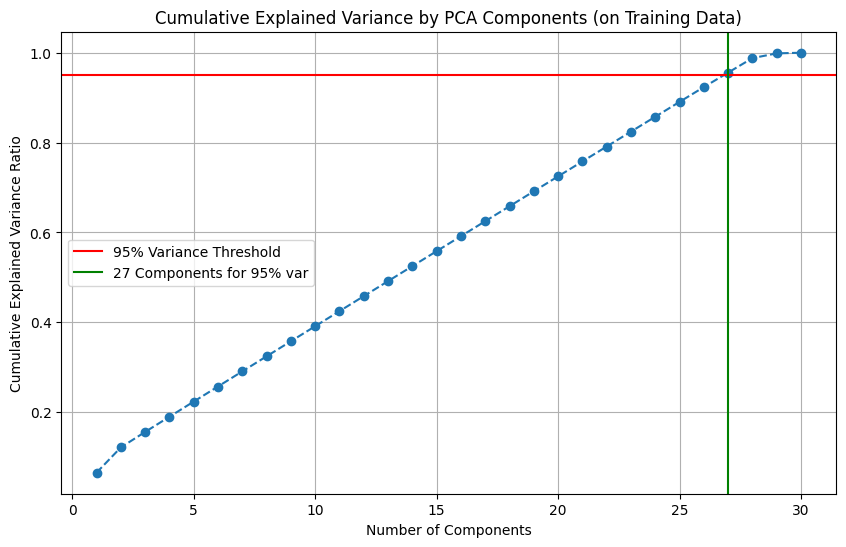

PCA explained variance plot saved as 'pca_explained_variance_train.png'


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components (on Training Data)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.axvline(x=n_components_95_variance, color='g', linestyle='-', label=f'{n_components_95_variance} Components for 95% var')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("pca_explained_variance_train.png")
plt.show()
print("PCA explained variance plot saved as 'pca_explained_variance_train.png'")

pca_final = PCA(n_components=n_components_95_variance, random_state=42)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

In [ ]:
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(data=X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(data=X_test_pca, columns=pca_columns)

print(f"\nShape of X_train after PCA (retaining {n_components_95_variance} components): {X_train_pca_df.shape}")
print(f"Shape of X_test after PCA: {X_test_pca_df.shape}")


Shape of X_train after PCA (retaining 27 components): (227845, 27)
Shape of X_test after PCA: (56962, 27)


In [ ]:
X_train_pca_df.to_csv("X_train_pca.csv", index=False)
X_test_pca_df.to_csv("X_test_pca.csv", index=False)
print("\nPCA transformed training and testing features saved.")


PCA transformed training and testing features saved.


In [ ]:
pca_2d_visualizer = PCA(n_components=2, random_state=42)
X_train_pca_2d = pca_2d_visualizer.fit_transform(X_train)
pca_2d_df_train = pd.DataFrame(data=X_train_pca_2d, columns=['PC1', 'PC2'])

y_train_series = y_train.reset_index(drop=True) if isinstance(y_train, pd.DataFrame) else y_train.reset_index(drop=True)
pca_2d_df_train['Class'] = y_train_series

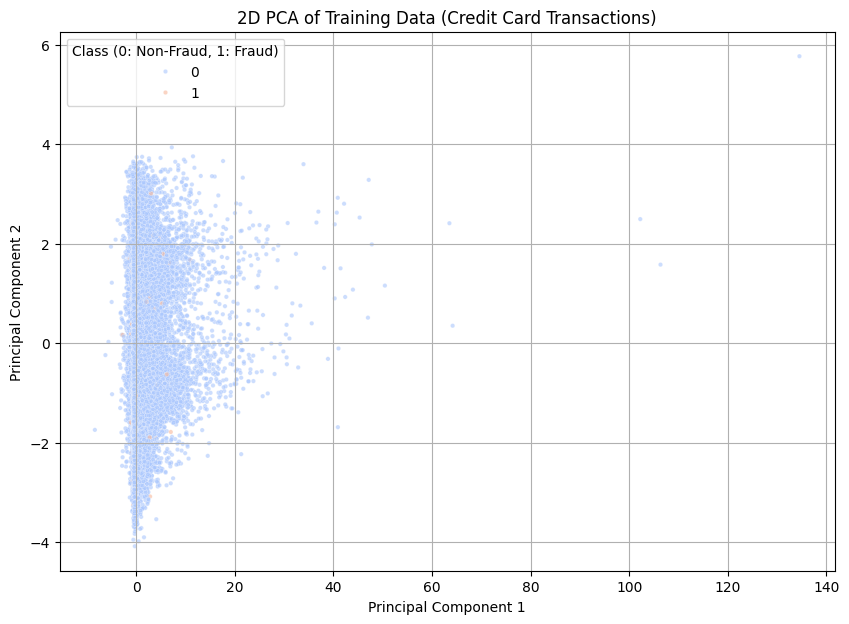

2D PCA visualization of training data saved as 'pca_2d_visualization_train.png'


In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_2d_df_train, x='PC1', y='PC2', hue='Class', palette='coolwarm', alpha=0.6, s=10)
plt.title('2D PCA of Training Data (Credit Card Transactions)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class (0: Non-Fraud, 1: Fraud)')
plt.grid(True)
plt.savefig("pca_2d_visualization_train.png")
plt.show()
print("2D PCA visualization of training data saved as 'pca_2d_visualization_train.png'")


In [ ]:
explained_var = pca_2d_visualizer.explained_variance_ratio_
print("Variansi yang dijelaskan oleh PC1 dan PC2:")
print(f"PC1: {explained_var[0]:.2%}")
print(f"PC2: {explained_var[1]:.2%}")
print(f"Total: {sum(explained_var):.2%}")

Variansi yang dijelaskan oleh PC1 dan PC2:
PC1: 6.54%
PC2: 5.63%
Total: 12.17%


# LDA

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train = pd.read_csv("X_train_scaled.csv")
y_train_series = pd.read_csv("y_train.csv").squeeze()
X_test = pd.read_csv("X_test_scaled.csv")
y_test_series = pd.read_csv("y_test.csv").squeeze()

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

In [ ]:
X_train_lda_df = pd.DataFrame(data=X_train_lda, columns=['LD1'])
X_test_lda_df = pd.DataFrame(data=X_test_lda, columns=['LD1'])

print(f"\nShape of X_train after LDA: {X_train_lda_df.shape}")
print(f"Shape of X_test after LDA: {X_test_lda_df.shape}")


Shape of X_train after LDA: (227845, 1)
Shape of X_test after LDA: (56962, 1)


In [ ]:
X_train_lda_df.to_csv("X_train_lda.csv", index=False)
X_test_lda_df.to_csv("X_test_lda.csv", index=False)

<ipython-input-39-5f487c99c670>:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("lda_1d_visualization_train.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


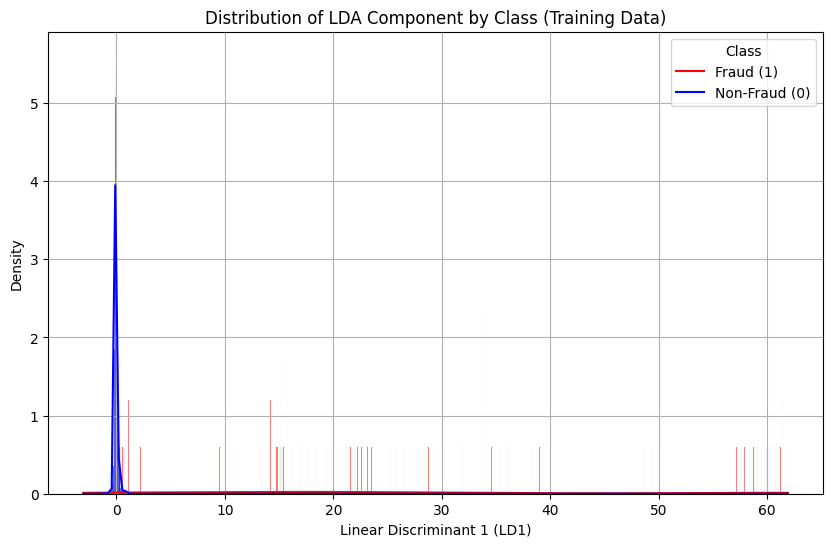

1D LDA visualization of training data saved as 'lda_1d_visualization_train.png'


In [ ]:
y_train_series = y_train.reset_index(drop=True) if isinstance(y_train, pd.DataFrame) else y_train.reset_index(drop=True)
X_train_lda_df_with_target = pd.concat([X_train_lda_df, y_train_series.rename('Class')], axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data=X_train_lda_df_with_target, x='LD1', hue='Class', palette={0: 'blue', 1: 'red'}, kde=True, stat="density", common_norm=False)
plt.title('Distribution of LDA Component by Class (Training Data)')
plt.xlabel('Linear Discriminant 1 (LD1)')
plt.ylabel('Density')
plt.legend(title='Class', labels=['Fraud (1)', 'Non-Fraud (0)'])
plt.grid(True)
plt.savefig("lda_1d_visualization_train.png")
plt.show()
print("1D LDA visualization of training data saved as 'lda_1d_visualization_train.png'")

# TSNE

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train_sample_tsne = pd.read_csv("X_train_sample_tsne.csv")
y_train_sample_tsne_series = pd.read_csv("y_train_sample_tsne.csv").squeeze()

In [ ]:
print(f"Applying t-SNE on the training sample data of shape: {X_train_sample_tsne.shape}")

Applying t-SNE on the training sample data of shape: (10000, 30)


In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300, verbose=1)
X_tsne_train_sample = tsne.fit_transform(X_train_sample_tsne)

X_tsne_train_sample_df = pd.DataFrame(data=X_tsne_train_sample, columns=['TSNE-Component1', 'TSNE-Component2'])

print(f"\nShape of data after t-SNE (on training sample): {X_tsne_train_sample_df.shape}")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 1.070s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.283333
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.079208
[t-SNE] KL divergence after 300 iterations: 2.821733

Shape of data after t-SNE

In [ ]:
y_train_sample_tsne_series = y_train_sample_tsne.reset_index(drop=True) if isinstance(y_train_sample_tsne, pd.DataFrame) else y_train_sample_tsne.reset_index(drop=True)
X_tsne_train_sample_df['Class'] = y_train_sample_tsne_series

X_tsne_train_sample_df.to_csv("tsne_transformed_train_sample_features.csv", index=False)

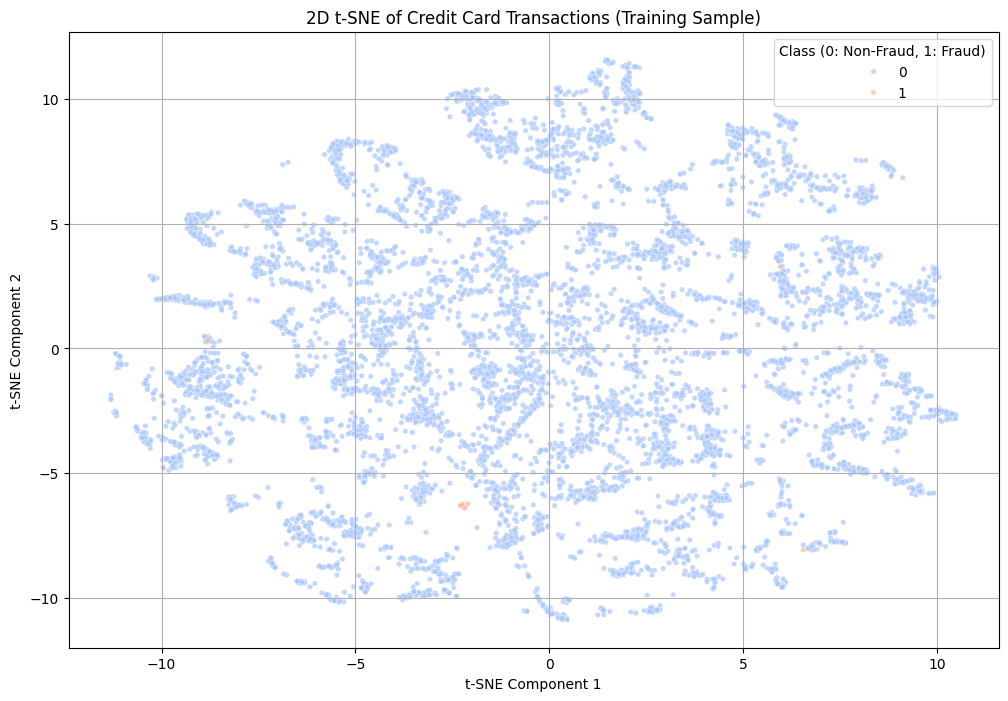

2D t-SNE visualization (on training sample) saved as 'tsne_2d_visualization_train_sample.png'


In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=X_tsne_train_sample_df, x='TSNE-Component1', y='TSNE-Component2',
                hue='Class', palette='coolwarm', alpha=0.7, s=15)
plt.title('2D t-SNE of Credit Card Transactions (Training Sample)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class (0: Non-Fraud, 1: Fraud)')
plt.grid(True)
plt.savefig("tsne_2d_visualization_train_sample.png")
plt.show()
print("2D t-SNE visualization (on training sample) saved as 'tsne_2d_visualization_train_sample.png'")


--- Combined Visualization: PCA vs LDA vs t-SNE ---


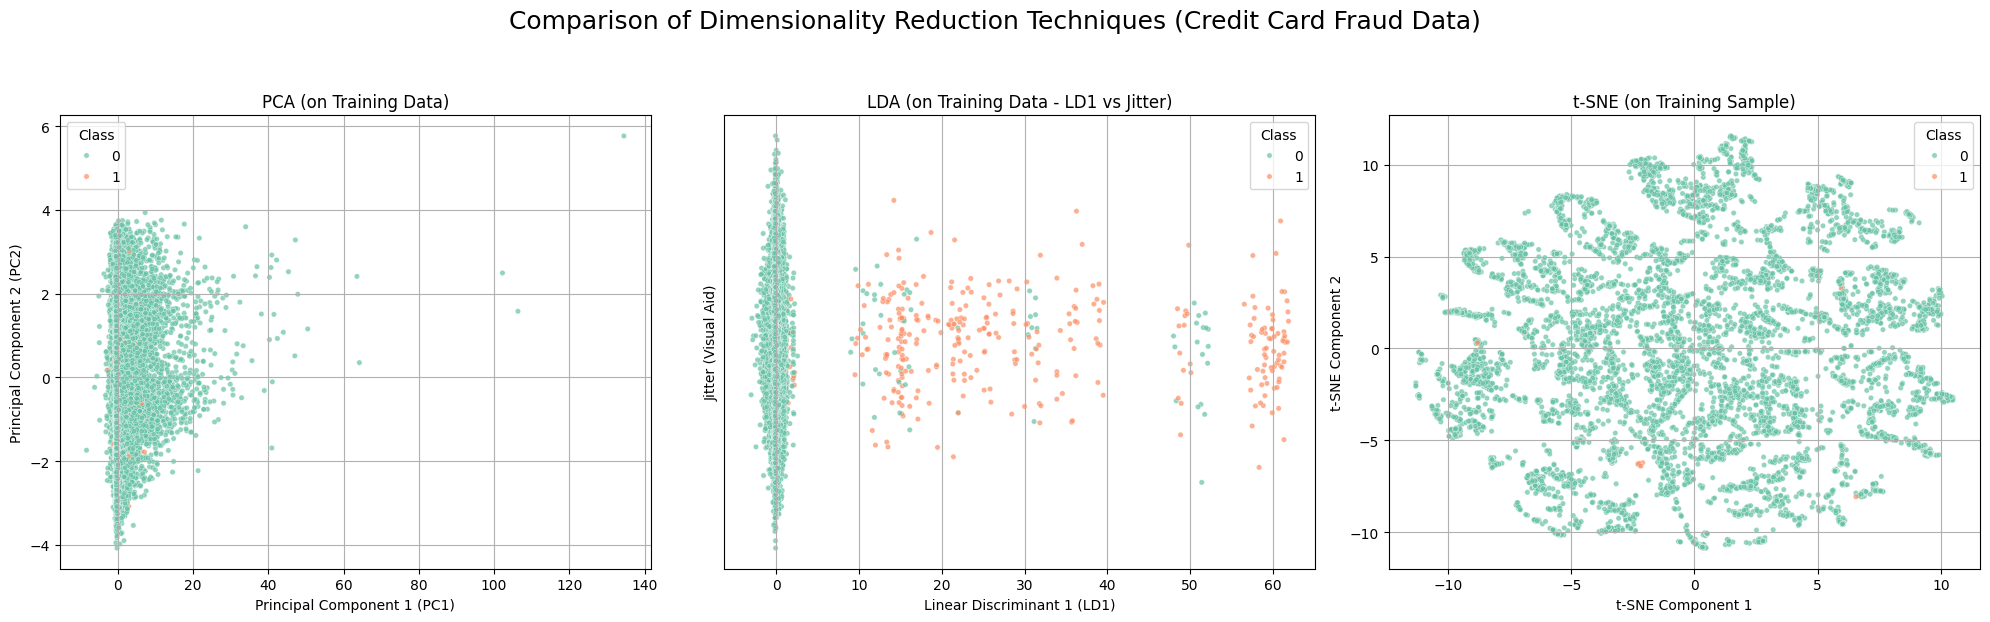


Combined visualization plot saved as 'dimensionality_reduction_comparison.png'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


print("\n--- Combined Visualization: PCA vs LDA vs t-SNE ---")

lda_plot_df = X_train_lda_df_with_target.copy()

lda_plot_df['LD2_jitter'] = np.random.normal(0, 0.1, size=len(lda_plot_df)) # Small random noise

tsne_plot_df = X_tsne_train_sample_df.rename(columns={'TSNE-Component1': 'TSNE1', 'TSNE-Component2': 'TSNE2'})


fig, axes = plt.subplots(1, 3, figsize=(20, 6)) # Increased figsize slightly

# 1. PCA Plot
if 'pca_2d_df_train' in locals() or 'pca_2d_df_train' in globals():
    sns.scatterplot(ax=axes[0], data=pca_2d_df_train, x='PC1', y='PC2', hue='Class', palette='Set2', alpha=0.7, s=15)
    axes[0].set_title('PCA (on Training Data)')
    axes[0].set_xlabel('Principal Component 1 (PC1)')
    axes[0].set_ylabel('Principal Component 2 (PC2)')
    axes[0].legend(title='Class')
    axes[0].grid(True)
else:
    axes[0].text(0.5, 0.5, 'PCA data not found.\nPlease run PCA step first.', ha='center', va='center')
    axes[0].set_title('PCA')


# 2. LDA Plot
if 'lda_plot_df' in locals() or 'lda_plot_df' in globals():
    sns.scatterplot(ax=axes[1], data=lda_plot_df, x='LD1', y='LD2_jitter', hue='Class', palette='Set2', alpha=0.7, s=15)
    axes[1].set_title('LDA (on Training Data - LD1 vs Jitter)')
    axes[1].set_xlabel('Linear Discriminant 1 (LD1)')
    axes[1].set_ylabel('Jitter (Visual Aid)')
    axes[1].get_yaxis().set_ticks([])
    axes[1].legend(title='Class')
    axes[1].grid(True)
else:
    axes[1].text(0.5, 0.5, 'LDA data not found.\nPlease run LDA step first.', ha='center', va='center')
    axes[1].set_title('LDA')


# 3. t-SNE Plot
if 'tsne_plot_df' in locals() or 'tsne_plot_df' in globals():
    sns.scatterplot(ax=axes[2], data=tsne_plot_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2', alpha=0.7, s=15)
    axes[2].set_title('t-SNE (on Training Sample)')
    axes[2].set_xlabel('t-SNE Component 1')
    axes[2].set_ylabel('t-SNE Component 2')
    axes[2].legend(title='Class')
    axes[2].grid(True)
else:
    axes[2].text(0.5, 0.5, 't-SNE data not found.\nPlease run t-SNE step first.', ha='center', va='center')
    axes[2].set_title('t-SNE')

plt.suptitle("Comparison of Dimensionality Reduction Techniques (Credit Card Fraud Data)", fontsize=18, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("dimensionality_reduction_comparison.png")
plt.show()
print("\nCombined visualization plot saved as 'dimensionality_reduction_comparison.png'")